# EDA

In [ ]:
# https://www.kaggle.com/code/nikitagrec/house-prices-clustering/notebook#9.-Clustering

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
macro = pd.read_csv("macro.csv/macro.csv")
train = pd.read_csv("train.csv/train.csv")
test = pd.read_csv("test.csv/test.csv")
sample_sub = pd.read_csv("sample_submission.csv/sample_submission.csv")

In [119]:
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [120]:
macro.value_counts()

Series([], dtype: int64)

In [121]:
list(train.columns)

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

In [122]:
train['sub_area'].nunique()

146

In [123]:
macro.old_house_share.unique()

array([0.3, 0.4, nan])

In [124]:
list(macro.columns)

['timestamp',
 'oil_urals',
 'gdp_quart',
 'gdp_quart_growth',
 'cpi',
 'ppi',
 'gdp_deflator',
 'balance_trade',
 'balance_trade_growth',
 'usdrub',
 'eurrub',
 'brent',
 'net_capital_export',
 'gdp_annual',
 'gdp_annual_growth',
 'average_provision_of_build_contract',
 'average_provision_of_build_contract_moscow',
 'rts',
 'micex',
 'micex_rgbi_tr',
 'micex_cbi_tr',
 'deposits_value',
 'deposits_growth',
 'deposits_rate',
 'mortgage_value',
 'mortgage_growth',
 'mortgage_rate',
 'grp',
 'grp_growth',
 'income_per_cap',
 'real_dispos_income_per_cap_growth',
 'salary',
 'salary_growth',
 'fixed_basket',
 'retail_trade_turnover',
 'retail_trade_turnover_per_cap',
 'retail_trade_turnover_growth',
 'labor_force',
 'unemployment',
 'employment',
 'invest_fixed_capital_per_cap',
 'invest_fixed_assets',
 'profitable_enterpr_share',
 'unprofitable_enterpr_share',
 'share_own_revenues',
 'overdue_wages_per_cap',
 'fin_res_per_cap',
 'marriages_per_1000_cap',
 'divorce_rate',
 'construction_val

In [125]:
train.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)

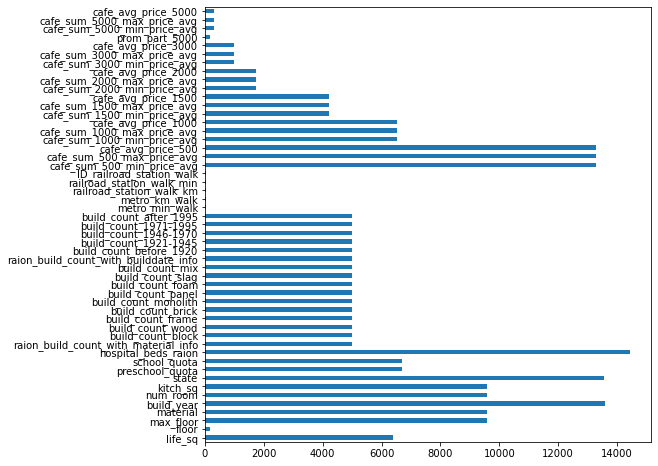

In [126]:
train_null = train.isna().sum()
plt.figure(figsize=(8,8))
train_null[train_null!=0].plot(kind='barh');

In [136]:
# Below code gives percentage of null in every column
null_percentage = train.isnull().sum()/train.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>30].keys()

In [137]:
len(col_to_drop)

10

In [138]:
train.drop(col_to_drop,axis=1, inplace=True)

# to fill missing values:
- fill with specific value
- fill with median 
- or fill with mean

In [92]:
# reference
# data['FireplaceQu'].fillna('No pool',inplace=True)
# data[['FireplaceQu','Fireplaces']].head(3)

# data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)


,0


In [ ]:
 # to drop NaN values from rows ( result shows % of data dropped)
# print(round(1-data.dropna().shape[0]/data.shape[0],4))
# data.dropna(inplace=True)

# Numerical Data

In [139]:
train.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,id,full_sq,life_sq,floor,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,23783.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,1.765705e+07,84056.425552,0.218922,0.118871,5140.026156,3271.272464,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,2.064961e+07,57871.285899,0.175090,0.118688,3816.625140,2169.759592,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,2.081628e+06,2546.000000,0.001879,0.000000,175.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
10%,3050.000000,34.000000,18.000000,2.000000,4.787424e+06,9553.000000,0.045674,0.000699,656.000000,1104.000000,...,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,6.000000,0.000000,3.000000e+06
25%,7620.500000,38.000000,20.000000,3.000000,7.307411e+06,21819.000000,0.063755,0.019509,1706.000000,1874.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,1.050803e+07,83502.000000,0.167526,0.072158,4857.000000,2854.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,1.803644e+07,122862.000000,0.336177,0.195781,7103.000000,4050.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
90%,27426.000000,79.000000,56.000000,15.000000,4.036700e+07,165727.000000,0.496315,0.306977,9753.000000,5278.000000,...,67.000000,17.000000,3.000000,27.000000,54.000000,1.000000,16.000000,112.000000,13.000000,1.180000e+07
max,30473.000000,5326.000000,7478.000000,77.000000,2.060718e+08,247469.000000,0.852923,0.521867,19223.000000,11926.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


# Categorical Features

In [141]:
train.describe(include='all')

,id,timestamp,full_sq,life_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471,30471.000000,24088.000000,30304.000000,30471,30471,3.047100e+04,30471.000000,30471.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
unique,NaN,1161,NaN,NaN,NaN,2,146,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-12-16,NaN,NaN,NaN,Investment,Poselenie Sosenskoe,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,160,NaN,NaN,NaN,19448,1776,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15237.917397,NaN,54.214269,34.403271,7.670803,NaN,NaN,1.765705e+07,84056.425552,0.218922,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,NaN,38.031487,52.285733,5.319989,NaN,NaN,2.064961e+07,57871.285899,0.175090,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,2.081628e+06,2546.000000,0.001879,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,NaN,38.000000,20.000000,3.000000,NaN,NaN,7.307411e+06,21819.000000,0.063755,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,NaN,49.000000,30.000000,6.500000,NaN,NaN,1.050803e+07,83502.000000,0.167526,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,NaN,63.000000,43.000000,11.000000,NaN,NaN,1.803644e+07,122862.000000,0.336177,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06


# Corr plot

In [80]:
colnames_null_many

RangeIndex(start=0, stop=1, step=1)

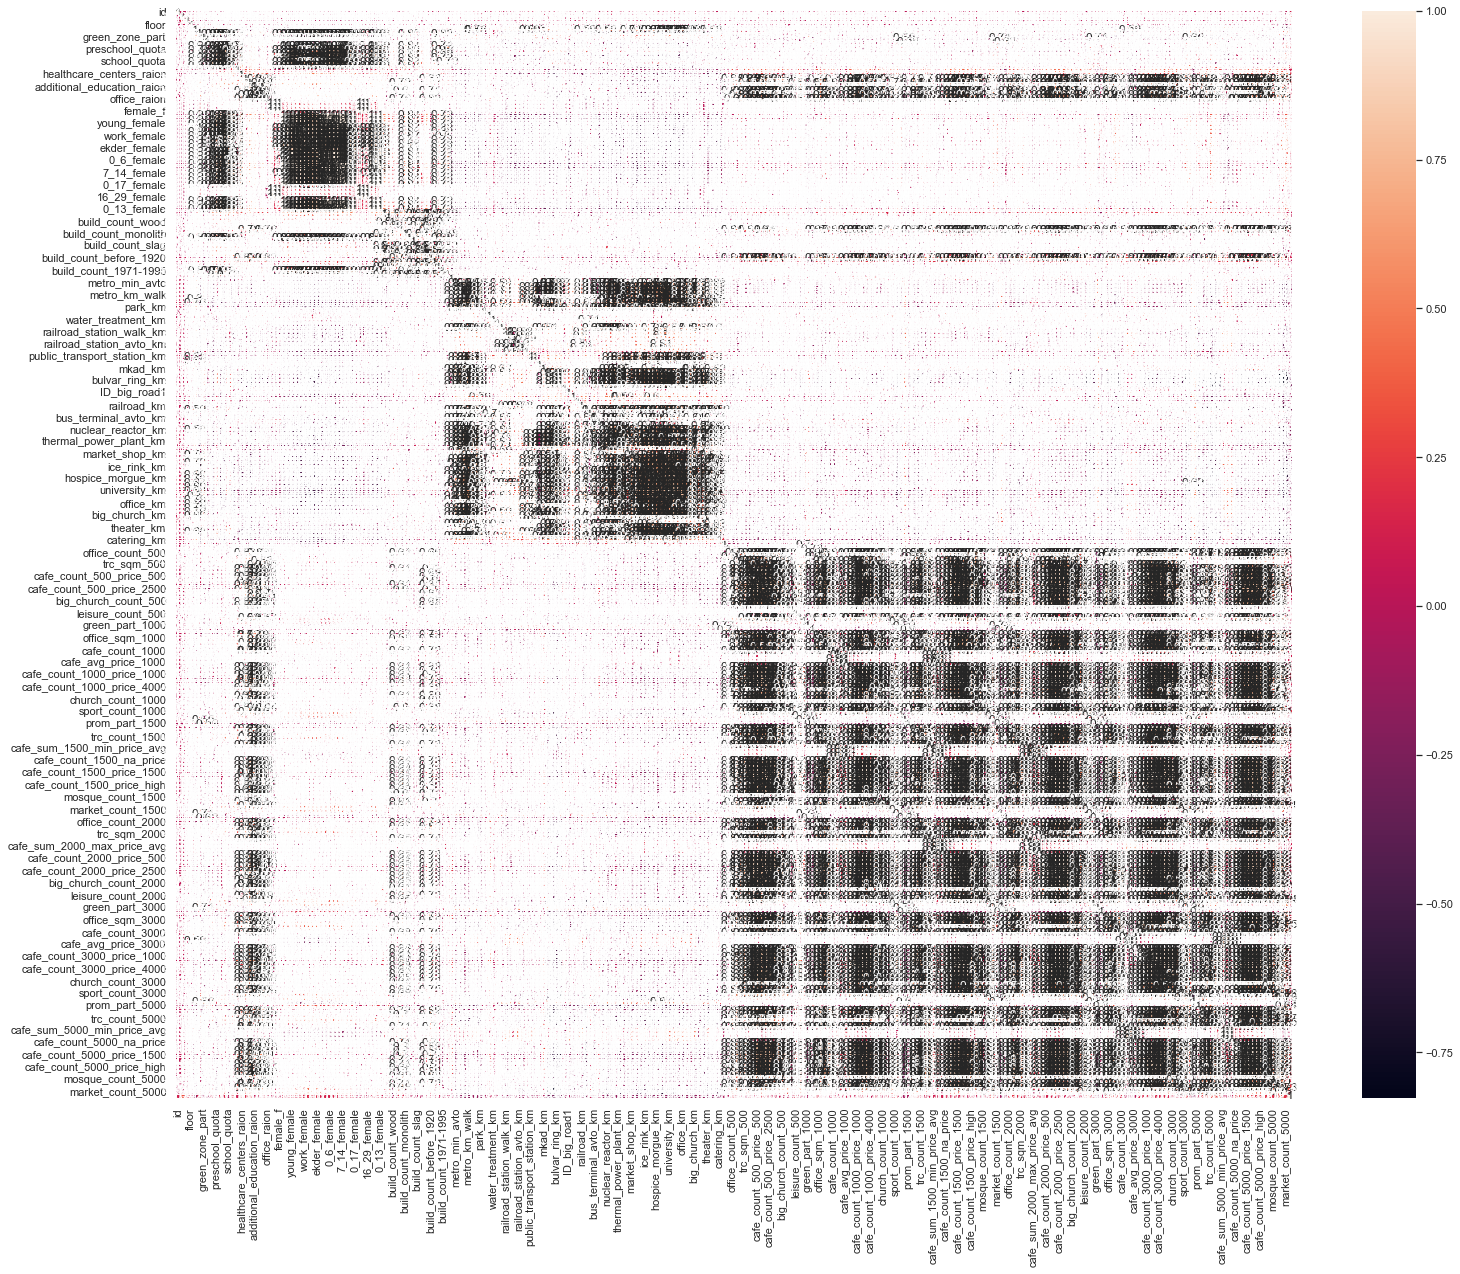

In [144]:
plt.figure(figsize=(25,20))
sb.set(font_scale=1)
sb.heatmap(train.corr(),annot=True);

In [143]:
import seaborn as sb

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

macro_numeric = macro.select_dtypes(include=numerics)

In [22]:
macro_numeric.shape

(2484, 96)

<AxesSubplot:>

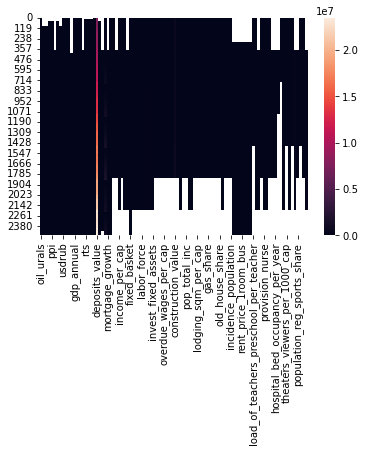

In [23]:
sb.heatmap(macro_numeric)

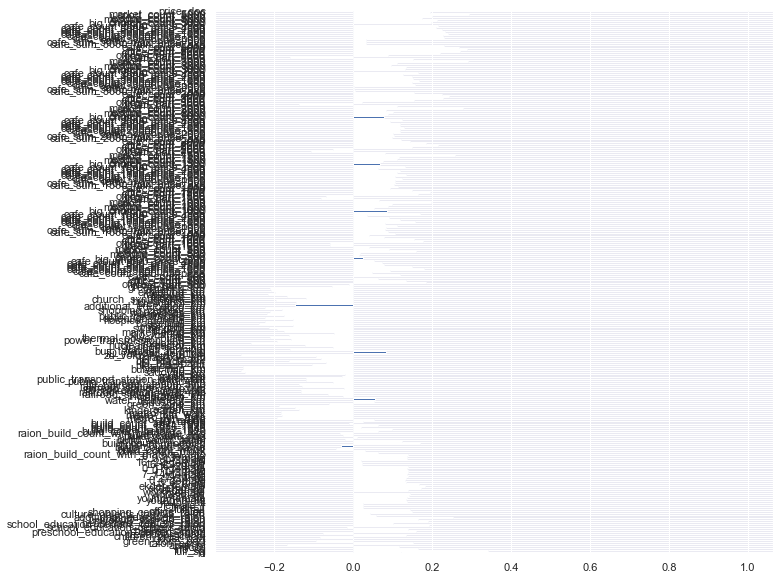

In [145]:
plt.figure(figsize=(10,10))
train.corr()['price_doc'].plot(kind='barh');

In [146]:
numer = set(train.corr()['price_doc'].index)
categ = list(set(train.columns) - set(train.corr()['price_doc'].index))

In [33]:
# macro.isnull().sum()

[0, 0, 90, 90, 31, 31, 365, 31, 90, 3, 3, 3, 396, 0, 0, 0, 365, 10, 10, 10, 1, 0, 31, 414, 0, 365, 0, 658, 1023, 293, 658, 293, 658, 0, 293, 293, 293, 293, 293, 293, 293, 293, 658, 658, 658, 658, 658, 658, 658, 658, 658, 293, 658, 658, 293, 293, 658, 658, 658, 658, 658, 658, 658, 658, 658, 658, 293, 658, 658, 658, 273, 273, 273, 273, 273, 273, 273, 1023, 658, 293, 658, 1389, 1389, 658, 293, 293, 658, 1023, 1023, 1753, 1754, 293, 1023, 293, 1023, 658, 1023, 1023, 658, 658]


In [149]:
# convert category variables into numerical format
data_targ = train.copy()
for i in categ:
    data_targ[i] = data_targ[i].factorize()[0]
data_targ.head(3)

,id,timestamp,full_sq,life_sq,floor,product_type,sub_area,area_m,raion_popul,green_zone_part,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,0,43,27.0,4.0,0,0,6407578.100,155572,0.189727,...,9,4,0,13,22,1,0,52,4,5850000
1,2,1,34,19.0,3.0,0,1,9589336.912,115352,0.372602,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2,43,29.0,2.0,0,2,4808269.831,101708,0.112560,...,10,3,0,11,27,0,4,67,10,5700000


In [150]:
# normalize data bacause scale of data varies greatly

In [152]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
data_targ.drop(['price_doc'],axis=1,inplace=True)
nrm = Normalizer()
nrm.fit(data_targ)
normal_data = nrm.transform(data_targ)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [44]:
# visualization method - TSNE for clustering the data
from sklearn.manifold import TSNE
tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(normal_data)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1]);

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
30466    1975.0
30467    1935.0
30468       NaN
30469    2003.0
30470    1968.0
Name: build_year, Length: 30471, dtype: float64

In [ ]:
link = ward(res_tsne)
vb = fcluster(link,t=300, criterion='distance')
fig = plt.figure(figsize=(25,25))
ax1 = fig.add_subplot(3,3,1)
pd.value_counts(vb).plot(kind='barh')
ax2 = fig.add_subplot(3,3,2)
axpl_2 = sb.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],hue=vb,palette="Set1");
axpl_2.legend_.remove()

In [ ]:
# dendrogram
sb.set(style='white')
plt.figure(figsize=(10,7))
#link = ward(res_tsne)
dendrogram(link)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [300,300],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()

In [ ]:
# silhouette plot
assign = vb
cluster_labels=np.unique(assign)
n_clusters = len(np.unique(assign))
silhouette_vals = silhouette_samples(res_tsne, assign, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(10,8))
for i , c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[assign==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower,y_ax_upper),
                c_silhouette_vals,height=1.0,edgecolor='none',color=color)
        yticks.append((y_ax_lower+y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,color="red",linestyle= "--")
plt.yticks(yticks , cluster_labels + 1)
plt.ylabel ('Cluster')
plt.xlabel('Silhouette coefficient')

In [ ]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],\
                     hue=data_new['SalePrice'],s=70,palette="hot");#,palette="RdBu");

# Feature Engineering

In [ ]:
# function to preprocess our data 
 
# def preprocessing_data(data):

#     # Convert the following numerical labels from integer to float
#     float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)

#     # combine some cat features 
#     data["features_combination"] = (data.education_level.astype(str) + "_" + data.job_type.astype(str) )

#     # remove individual features that are combined together
#     data = data.drop(['education_level','job_type'], axis=1)

#     # categorical features to be converted by One Hot Encoding
#     categ = [
#       "relationship_with_head",
#       "marital_status",
#       "features_combination",
#       "country"
#       ]

#     # One Hot Encoding conversion
#     data = pd.get_dummies(data, prefix_sep="_", columns=categ)

#     # Label Encoder conversion
#     data["location_type"] = le.fit_transform(data["location_type"])
#     data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
#     data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

#     # drop uniquid column
#     data = data.drop(["uniqueid"], axis=1)

#     # scale our data 
#     scaler = StandardScaler()
#     data = scaler.fit_transform(data)

#     return data